In [78]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import f
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [79]:
Ins_df = pd.read_csv(r'C:\Users\dell\Downloads\insurance.csv')

In [80]:
Ins_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [81]:
print(Ins_df.shape)
print(Ins_df.dtypes)

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [82]:
Ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [83]:
##5 point summary of numerical attributes
Ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249D6759128>


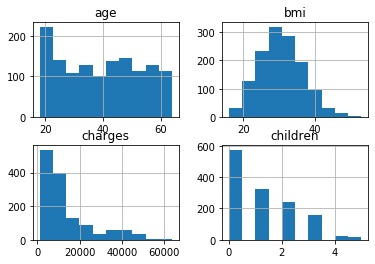

In [10]:
print(Ins_df.hist()) ##Histogram Distribution 

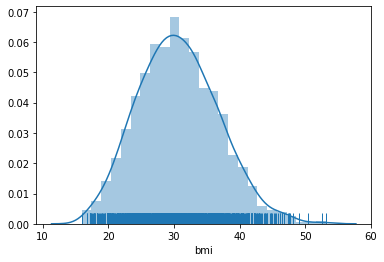

In [25]:
sns.distplot( Ins_df["bmi"] , hist=True, rug=True)

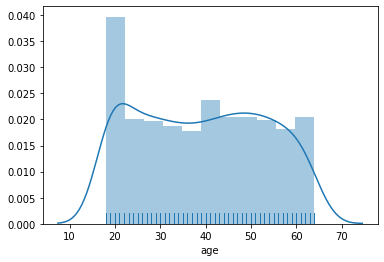

In [28]:
sns.distplot( Ins_df["age"] , hist=True, rug=True)

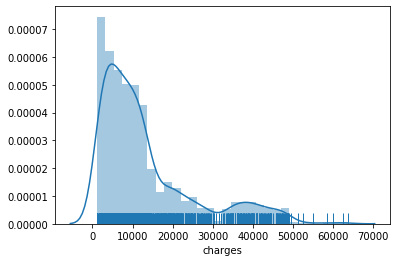

In [32]:
sns.distplot( Ins_df["charges"] , hist=True, rug=True)

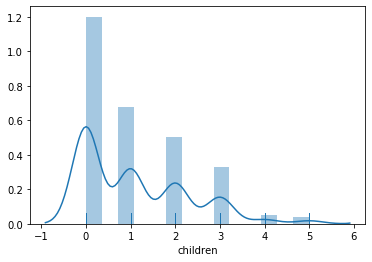

In [33]:
sns.distplot( Ins_df["children"] , hist=True, rug=True)

###### Measure of skewness 
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

In [84]:
Ins_df.skew(axis = 0, skipna = True) ##Measure of skewness 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


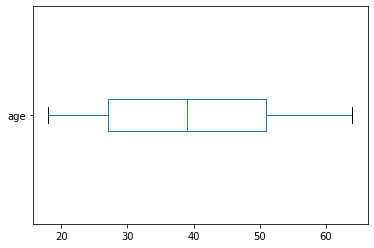

In [35]:
#print(Ins_df.boxplot(column = ['age','bmi','charges'],grid = False, vert = False)) -- too small to view
print(Ins_df.boxplot(column = ['age'],grid = False, vert = False)) #thus no outlier

AxesSubplot(0.125,0.125;0.775x0.755)


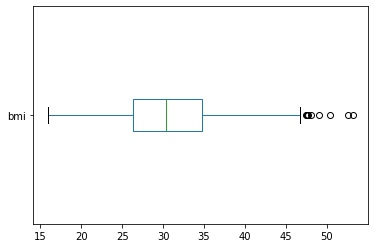

In [36]:
print(Ins_df.boxplot(column = ['bmi'],grid = False, vert = False))
#thus right shewked because outlier are present more on rigthen side.

AxesSubplot(0.125,0.125;0.775x0.755)


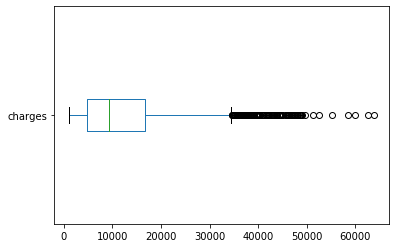

In [37]:
print(Ins_df.boxplot(column = ['charges'],grid = False, vert = False))
#thus right shewked because outlier are present more on rigthen side.

In [38]:
Ins_df['age'].value_counts(sort=False) #There are no people under 18 age as primary holder of policy.

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [85]:
Ins_df['sex'] = LabelEncoder().fit_transform(Ins_df['sex'])
Ins_df.head() # 0 is Female and 1 is male

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [86]:
Ins_df['smoker'] = LabelEncoder().fit_transform(Ins_df['smoker'])
Ins_df.head() # yes is 1 and 0 is no

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249D8B931D0>,
      dtype=object)

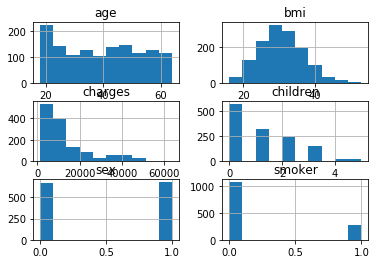

In [46]:
Ins_df.hist() #printed all distribution at once

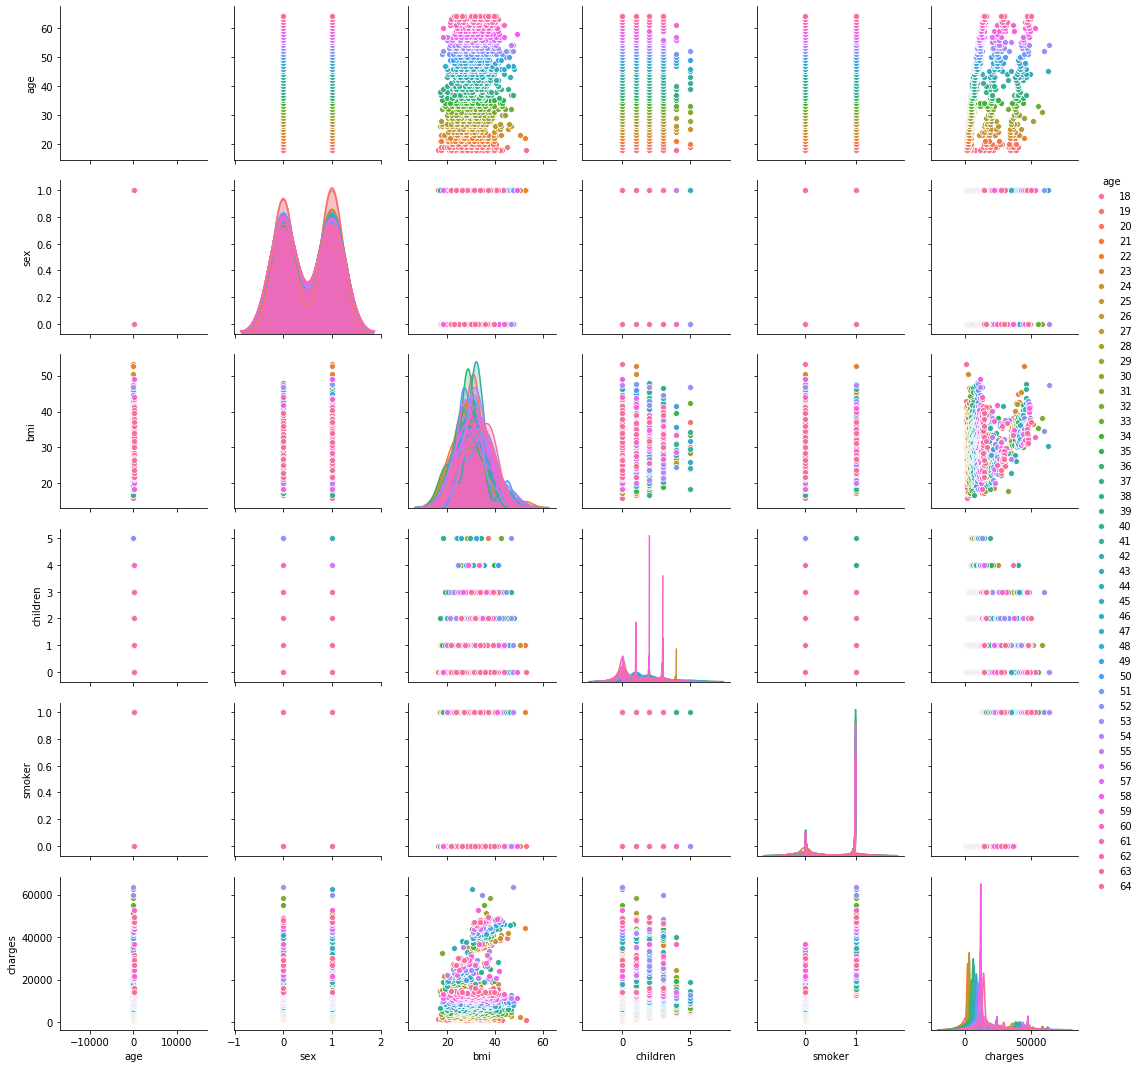

In [106]:
sns.pairplot(Ins_df, hue = 'age')

# 4c. Is the proportion of smokers significantly different  in different genders?  

Test of Proportion and variance 

Sex and smokers are two categorial varaible

Trying to see proportion of two categorial varaible columns

Ho = The Proportion are equal

Ha = The two proportions are not equal 


In [87]:
female_smokers = Ins_df[Ins_df['sex'] == 0].smoker.value_counts()[1]  # number of female smokers
male_smokers = Ins_df[Ins_df['sex'] == 1].smoker.value_counts()[1] # number of male smokers
n_females = Ins_df.sex.value_counts()[0] # number of females in the data
n_males = Ins_df.sex.value_counts()[1] #number of males in the data
print(female_smokers,male_smokers)
print(n_females,n_males )

115 159
662 676


In [88]:
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [89]:
stat, pval = proportions_ztest([female_smokers,male_smokers],[n_females,n_males])
print(stat, pval)

-2.7867402154855503 0.005324114164320532


# zcore of this proportion test is -2.7867SD lower.

Only 0.53% of pval(posibility of Ho being true) which is less than 1% of CI.

With 99% of confident  that we are rejecting Ho.

Therefore the proportion of smokers significantly different  in different genders

# 4a. Do charges of people who smoke differ significantly  from the people who don't? 


#### Ho = The means are equal
#### Ha = The two means are not equal

In [90]:
non_smokers = Ins_df.loc[Ins_df['smoker']==0,'charges'] ## yes is 1 and 0 is no
print(non_smokers.shape) 
print(non_smokers.head())
smokers = Ins_df.loc[Ins_df['smoker']==1,'charges']
print(smokers.shape)
print(smokers.head())

(1064,)
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64
(274,)
0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64


In [91]:
Ins_df.shape

(1338, 7)

In [92]:
print(non_smokers.mean())
print(smokers.mean())

8434.268297856199
32050.23183153285


In [93]:
t_statistic, p_value = ttest_ind(non_smokers,smokers)
print(t_statistic, p_value)
if p_value < 0.01:
    print(f'With a p-value of {round(p_value,9)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,9)} the difference is not significant. aka |We fail to reject the null|')

-46.664921172723716 8.271435842177219e-283
With a p-value of 0.0 the difference is significant. aka |We reject the null|


# b. Does bmi of males differ significantly from that of  females?

#### Ho = The means are equal
#### Ha = The two means are not equal

In [95]:
Male_BMI = Ins_df.loc[Ins_df['sex']==1,'bmi'] # 0 is Female and 1 is male
print(Male_BMI.shape) 
print(Male_BMI.head()) 
Female_BMI = Ins_df.loc[Ins_df['sex']==0,'bmi']
print(Female_BMI.shape)
print(Female_BMI.head()) 

(676,)
1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64
(662,)
0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64


In [96]:
print(Male_BMI.mean())
print(Female_BMI.mean())

30.943128698224832
30.377749244713023


In [97]:
t_statistic, p_value = ttest_ind(Male_BMI,Female_BMI)
print(t_statistic, p_value)
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,9)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,9)} the difference is not significant. aka |We fail to reject the null|')

1.696752635752224 0.08997637178984932
With a p-value of 0.089976372 the difference is not significant. aka |We fail to reject the null|


# 4d.d. Is the distribution of bmi across women with no  children, one child and two children, the same ?


In [98]:
Ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [58]:
Ins_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [99]:
Female_no_children = Ins_df.loc[(Ins_df['sex']==0 )& (Ins_df['children']==0),'bmi']
Female_one_children = Ins_df.loc[(Ins_df['sex']==0 )& (Ins_df['children']==1),'bmi']
Female_two_children = Ins_df.loc[(Ins_df['sex']==0 )& (Ins_df['children']==2),'bmi']

In [100]:
print( (len(Female_no_children ), Female_no_children .mean(),np.std(Female_no_children ,ddof =1)))
print((len(Female_one_children), Female_one_children.mean(),np.std(Female_one_children,ddof =1)))
print( (len(Female_two_children), Female_two_children.mean(),np.std(Female_two_children,ddof =1)))

(289, 30.361522491349486, 5.966934229366254)
(158, 30.05265822784811, 5.786831048981313)
(119, 30.64978991596637, 6.628199943377461)


In [64]:
Female_BMI_df = pd.DataFrame()

df1            = pd.DataFrame({'Children': 'Zero', 'Check_BMI':Female_no_children})
df2            = pd.DataFrame({'Children': 'One', 'Check_BMI':Female_one_children})
df3            = pd.DataFrame({'Children': 'Two', 'Check_BMI':Female_two_children})

Female_BMI_df = Female_BMI_df.append(df1) 
Female_BMI_df = Female_BMI_df.append(df2) 
Female_BMI_df = Female_BMI_df.append(df3) 
Female_BMI_df.sample(10)

,Children,Check_BMI
653,Two,36.300
860,Two,47.600
800,One,26.180
651,One,39.600
616,Zero,28.595
100,Zero,31.600
1120,Zero,31.400
1323,Two,40.370
441,Zero,33.500
952,One,28.405


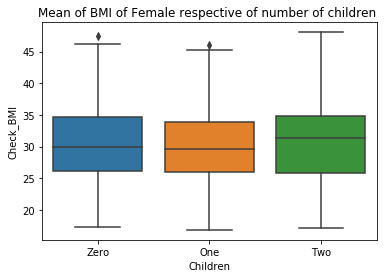

In [69]:
sns.boxplot(x = "Children", y = "Check_BMI", data = Female_BMI_df) 
plt.title('Mean of BMI of Female respective of number of children ')
plt.show()

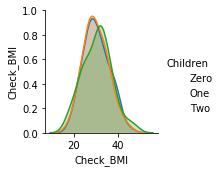

In [70]:
sns.pairplot(Female_BMI_df,diag_kind='kde',hue='Children')

# The above distribution of bmi across women with no  children, one child and two children are not same as per grapical representation

#### The boxplots show almost dissimilar shapes, location and spreads and there are outliers.

###  State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 



In [72]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Check_BMI ~ Children', data = Female_BMI_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(Female_BMI_df["Check_BMI"], 
                        Female_BMI_df["Children"]))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   One    Two   0.5971 0.6797 -1.1323 2.3265  False
   One   Zero   0.3089 0.8494 -1.1008 1.7186  False
   Two   Zero  -0.2883 0.8942 -1.8402 1.2636  False
---------------------------------------------------


###### In this example, p value is 0.715858 and it is greater than our chosen level of signifance at 5%

So the statistical decision is failed to reject the null hypothesis at 5% level of significance.

So there is  sufficient evidence that we failed to reject the null hypothesis that mean of female BMI is not significanly
different from each others.